In [1]:
import warnings
warnings.filterwarnings("ignore")
import jieba    # 分词包
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud   # 词云包

In [2]:
news = pd.read_excel('../data/all_news.xlsx')

In [3]:
news.tail()

,title,content,label
9544,深圳2个半小时直达汕头中心区！厦深铁路汕头联络线正式开通,厦深铁路汕头联络线今天正式开通营运。在2018年的最后一天，汕头市民收到了这样一份特别的新年...,财经
9545,影视行业2018大撤退：眼看他起高楼 眼见他楼塌了,寒冬过后就是新秩序的建立。对于在这个行业踏实做内容的人来说，修炼内功，专注内容才是当下要做的...,财经
9546,2019，谁将成为新的独角兽？,记者 | 肖芳2018年对创投行业来说是艰难的一年。经济环境趋冷，投资机构出现募资困难、退出...,财经
9547,180多岁的宝洁：怎么弄丢了中国消费者？,砺石导言：180岁的宝洁30年前进入中国的第一个部门就是“消费者市场研究部门”，而今宝洁风光...,财经
9548,猫眼电影宣布：2018年度票房突破600亿,【TechWeb】昨日@猫眼电影官方微博宣布了2018年中国电影年度票房突破600亿，这项统...,财经


In [4]:
news['label'].value_counts()

时尚    1467
财经    1369
科技    1328
汽车    1294
国际    1104
娱乐    1035
体育     984
军事     968
Name: label, dtype: int64

In [5]:
military = news[news['label'] == '军事']['content'].values.tolist()
sports = news[news['label'] == '体育']['content'].values.tolist()
world = news[news['label'] == '国际']['content'].values.tolist()
entertainment = news[news['label'] == '娱乐']['content'].values.tolist()
cars = news[news['label'] == '汽车']['content'].values.tolist()
tech = news[news['label'] == '科技']['content'].values.tolist()
economic = news[news['label'] == '财经']['content'].values.tolist()
fashion = news[news['label'] == '时尚']['content'].values.tolist()

In [6]:
# 分词与统计词频
def wordCount(content):
    segment=[]
    for line in content:
        try:
            segs = jieba.lcut(line)
            for seg in segs:
                if len(seg) > 1 and seg != '\r\n':
                    segment.append(seg)
        except:
            print(line)
            continue
    return segment

# 去停用词
def removeStopwords(segment):
    words_df = pd.DataFrame({'segment':segment})
    stopwords = pd.read_csv("../data/stopwords.txt",
                          index_col=False,
                          quoting=3,
                          sep="\t",
                          names=['stopword'], encoding='utf-8')
    words_df = words_df[~words_df.segment.isin(stopwords.stopword)]
    return words_df

# 统计排序
def statisticSort(words_df):
    words_stat = words_df.groupby(by=['segment'])['segment'].agg({"计数":np.size})
    words_stat = words_stat.reset_index().sort_values(by=["计数"], ascending=False)
    return words_stat

# 构建词云
def createWordcloud(words_stat):
    matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
    wordcloud=WordCloud(font_path="/System/Library/fonts/PingFang.ttc",background_color="black",max_font_size=80)
    word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
    wordcloud=wordcloud.fit_words(word_frequence)
    plt.imshow(wordcloud)
    

### 词云分析

#### 军事新闻

In [65]:
military_segment = wordCount(military)
military_df = removeStopwords(military_segment)
military_stat = statisticSort(military_df)

In [66]:
military_stat.head()

,segment,计数
23074,美国,2813
3488,中国,1981
14922,报道,1776
5332,俄罗斯,1536
16718,日本,1274


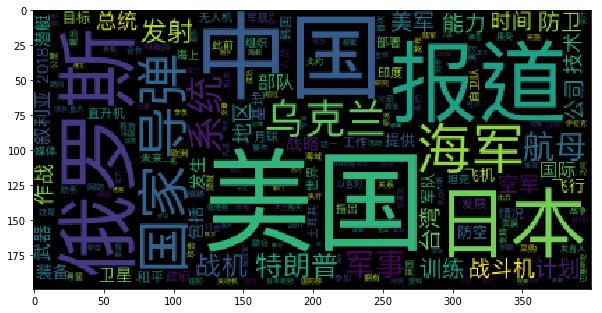

In [67]:
createWordcloud(military_stat)

#### 体育新闻

In [68]:
sports_segment = wordCount(sports)
sports_df = removeStopwords(sports_segment)
sports_stat = statisticSort(sports_df)

In [69]:
sports_stat.head()

,segment,计数
20851,比赛,3800
22905,球队,2256
22852,球员,2113
28398,赛季,1550
24856,篮板,1049


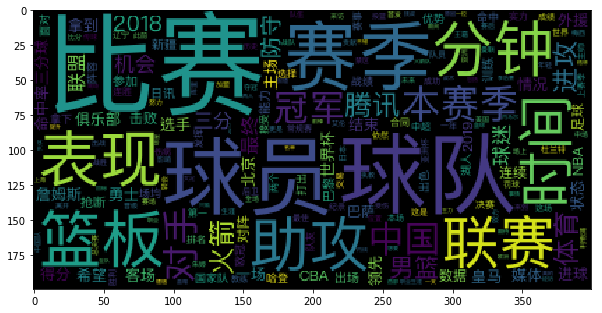

In [70]:
createWordcloud(sports_stat)

#### 娱乐新闻

In [36]:
entertainment_segment = wordCount(entertainment)
entertainment_df = removeStopwords(entertainment_segment)
entertainment_stat = statisticSort(entertainment_df)

In [37]:
entertainment_stat.head()

,segment,计数
34246,网友,1610
30672,电影,1496
33302,粉丝,1090
37169,观众,1002
35856,节目,927


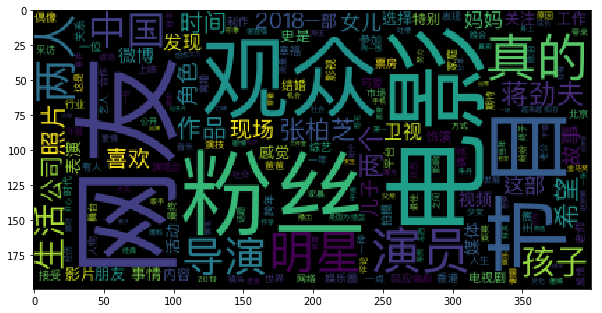

In [38]:
createWordcloud(entertainment_stat)

#### 国际新闻

In [39]:
world_segment = wordCount(world)
world_df = removeStopwords(world_segment)
world_stat = statisticSort(world_df)

In [40]:
world_stat.head()

,segment,计数
28032,美国,2779
24604,特朗普,1860
18464,报道,1666
5437,中国,1197
20546,日本,1089


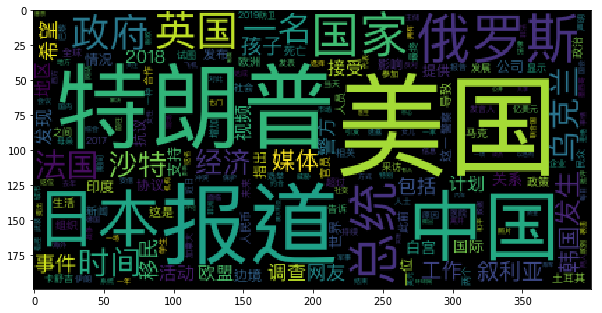

In [41]:
createWordcloud(world_stat)

#### 汽车新闻

In [42]:
cars_segment = wordCount(cars)
cars_df = removeStopwords(cars_segment)
cars_stat = statisticSort(cars_df)

In [43]:
cars_stat.head()

,segment,计数
29974,车型,3594
28840,设计,2762
22552,汽车,2160
11826,发动机,1840
10856,动力,1599


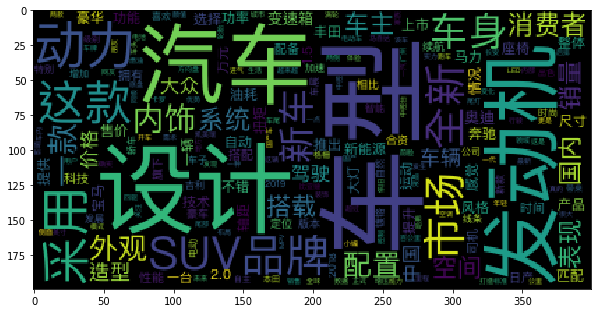

In [44]:
createWordcloud(cars_stat)

#### 科技新闻

In [45]:
tech_segment = wordCount(tech)
tech_df = removeStopwords(tech_segment)
tech_stat = statisticSort(tech_df)

In [46]:
tech_stat.head()

,segment,计数
17869,公司,4829
44544,用户,3388
12945,中国,3005
29710,市场,2801
30028,平台,2583


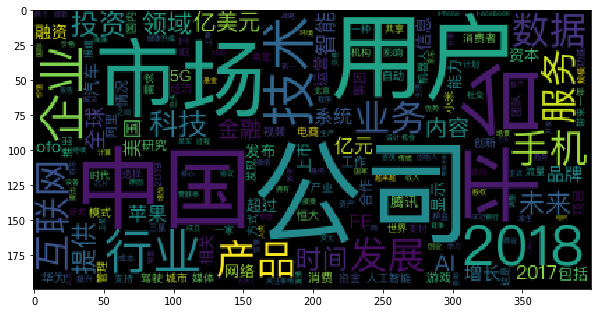

In [47]:
createWordcloud(tech_stat)

#### 财经新闻

In [48]:
economic_segment = wordCount(economic)
economic_df = removeStopwords(economic_segment)
economic_stat = statisticSort(economic_df)

In [49]:
economic_stat.head()

,segment,计数
17659,公司,5924
29583,市场,4080
12703,中国,3407
2415,2018,2963
15375,企业,2883


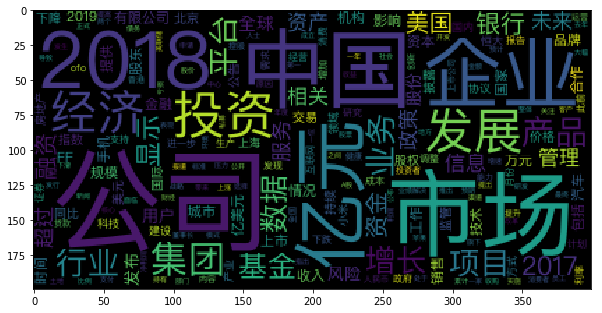

In [50]:
createWordcloud(economic_stat)

#### 时尚新闻

In [51]:
fashion_segment = wordCount(fashion)
fashion_df = removeStopwords(fashion_segment)
fashion_stat = statisticSort(fashion_df)

In [52]:
fashion_stat.head()

,segment,计数
29775,搭配,4338
53743,黑色,2441
49770,造型,2202
49621,选择,1887
31257,时尚,1781


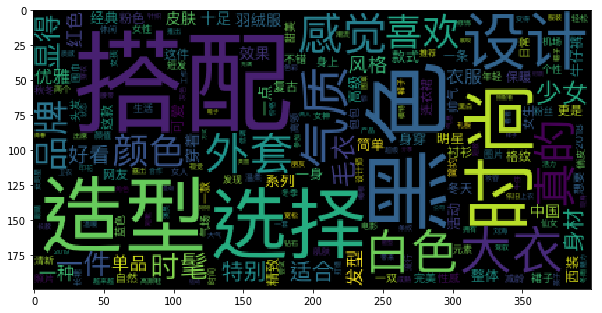

In [53]:
createWordcloud(fashion_stat)

分析：
* 军事新闻和国际新闻的词频统计结果比较相似，美国、中国、日本等国家名出现较多，国际新闻出现“特朗普”较多；
* 体育新闻中出现比赛、球队、球员这些词比较多，很好区分；
* 娱乐新闻中出现网友最多，其次是电影、粉丝和观众等，可以看出娱乐新闻比较喜欢提及网友的看法，娱乐新闻内容主要围绕电影等信息；
* 汽车新闻主要围绕与汽车相关，出现车型、设计、发动机等非常多；
* 科技新闻和财经新闻比较相似，出现公司、市场、中国等次都比较频繁；
* 时尚新闻出现搭配、黑色、造型、选择和时尚等词较多，可以看出时尚新闻主要以穿搭为主，在词云中黑色和白色这两种颜色词比较明显，难道如今黑色   和白色引领了潮流？

### 统计文本长度

In [7]:
print("军事:", np.mean([len(i.replace(' ','')) for i in military]))
print("体育:", np.mean([len(i.replace(' ','')) for i in sports]))
print("娱乐:", np.mean([len(i.replace(' ','')) for i in entertainment]))
print("国际:", np.mean([len(i.replace(' ','')) for i in world]))
print("汽车:", np.mean([len(i.replace(' ','')) for i in cars]))
print("科技:", np.mean([len(i.replace(' ','')) for i in tech]))
print("财经:", np.mean([len(i.replace(' ','')) for i in economic]))
print("时尚:", np.mean([len(i.replace(' ','')) for i in fashion]))
print("全部:", np.mean([len(i.replace(' ','')) for i in news['content'].tolist()]))

军事: 873.819214876033
体育: 1135.8678861788617
娱乐: 1181.255072463768
国际: 865.1702898550725
汽车: 967.9706336939722
科技: 1854.0414156626507
财经: 1762.289992695398
时尚: 1330.8050443081117
全部: 1279.8078332809719


In [8]:
news['content_length'] = news['content'].apply(lambda x:len(x.replace(' ','')))

In [9]:
news['content_length'].describe()

count     9549.000000
mean      1279.807833
std       1186.981928
min         15.000000
25%        608.000000
50%        877.000000
75%       1565.000000
max      28562.000000
Name: content_length, dtype: float64

### 评论数量、来源分析

In [57]:
data = pd.read_excel('../data/all_news_addotherfeatures.xlsx')

In [58]:
data.head()

,title,content,source,comment_num,label
0,国足今晚能否捏成“软柿子”？对手全队身价刚够买北京二环两套房,继上一场与印度的“地球德比”之后，20日晚，国足将在海口与巴勒斯坦男足进行一场热身赛。谈到巴...,话边,51,体育
1,想在NBA打上比赛就得这么干 周琦吸取阿联教训主动求变,北京时间11月19日，周琦在一次访谈节目中透露，他已经更换了美方经纪人，他在等待机会的同时，...,奎哥,40,体育
2,C罗该拿金球奖又一证据！2018射手王 力压梅西姆巴佩,金球奖前不久，一家足球研究机构用大数据的方式计算出了争夺金球奖的球星们的总得分，而C罗名列第...,足球论点,35,体育
3,勇士之后又一队爆发内讧！老板欲重建两大巨星都可交易,北京时间11月20日，据NBA记者Shams Charania报道，华盛顿奇才的球员们在前几...,罗说NBA,34,体育
4,土豪！C罗坐私人飞机回里斯本度假 同未婚妻乔治娜秀恩爱,C罗和女友作为足坛的高富帅，C罗终于快结婚了，意大利媒体披露，在12月底到1月初的这段时间，...,足球论点,24,体育


In [105]:
data['source'] = data['source'].apply(lambda x:x.strip())

**新闻来源分析**

In [106]:
source = data.pivot_table(index='label', values='source', aggfunc=' '.join)

In [107]:
source

,source
label,
体育,话边 奎哥 足球论点 罗说NBA 足球论点 擅先生 鲸鱼体育 快意江湖 星球嘉年华 李喜林篮...
军事,环球时报军事 参考防务 环球时报国际 观察者网军工频道 环球时报军事 观察者网国际频道 环球...
国际,钱克锦国际漫谈 之一 参考消息 环视全球 环球网 观察者网国际频道 国际人物志 环球网 环球...
娱乐,毒眸 黄鑫亮 新京报 鲜梦娱评 笑娱 不八卦会死人 娱评圈内外 文艺圈 剧说天下 电影馆长 ...
时尚,BoF时装商业评论 BoF时装商业评论 华丽志 吉良先生 文刀米 BoF时装商业评论 新氧A...
汽车,爱车集中营 汽修KING 简涂 车技集合 趣味评车 汽车凳 醉梦旅途 纵横车视界 成都商报 ...
科技,每日经济新闻 澎湃新闻 盖饭科技实录 硅谷分析狮 澎湃新闻 科技日报 通信世界 IT时报 I...
财经,市界 中国青年网 中国青年网 36氪 中国新闻网 新京报 每日经济新闻 澎湃新闻 新京报经济...


In [109]:
source['source'] = source['source'].apply(lambda x:set(x.split(' ')))

In [110]:
source

,source
label,
体育,"{柳号, 球迷的篮球梦, 英俊的德罗巴, 大嘴巴爵爷, 吴权林, 中国女排, 喜之郎聊球, ..."
军事,"{钧正平工作室, 环球时报军事, 东部战区, 环球时报国际, 军事报道, 观察者网军工频道,..."
国际,"{图说国际, 仙踪, 24小时热搜, 全世界都在看, 国际风暴眼, 蜜蜂国际, 参考视频, ..."
娱乐,"{躺着看搞笑的段子, 辽东春秋, dou是八卦, 娱塘, 春秋八卦, 娱乐黑皮诺, 鲜评, ..."
时尚,"{美少女挖掘机, itMode, 叫醒衣橱, 新美十分, 蓝小姐和黄小姐, InstaFit..."
汽车,"{新车评, 醉春风说娱乐, 新智驾, 青岛崂山交警, 如姐谈车, 淘股先锋, 汽车小涛, 型..."
科技,"{柏颖, 中新经纬, 运营商世界网, 网络传播杂志, 新智驾, 猎云网, 钛媒体APP, 华..."
财经,"{中新经纬, 股市藏宝图, 钛媒体APP, 华尔街见闻, 上海证券报公司圈, 小食代, 皮海..."


**查看每类新闻的交集**

In [114]:
source.loc['军事','source'] & source.loc['国际','source']

{'参考消息',
 '参考视频',
 '央视网新闻',
 '新华国际',
 '海外网',
 '牛弹琴',
 '环球时报国际',
 '环球时报热点',
 '环球时报视频',
 '环球时报评论',
 '环球网',
 '观察者网军工频道',
 '观察者网国际频道'}

In [115]:
source.loc['科技','source'] & source.loc['财经','source']

{'21世纪经济报道',
 '36氪',
 'AI财经社',
 'GPLP',
 'IT爆料汇',
 'TechWeb',
 'e公司',
 '上游财经',
 '中国之声',
 '中国企业家杂志',
 '中国基金报',
 '中国新闻网',
 '中国经济网',
 '中国证券报',
 '中国青年网',
 '中新经纬',
 '中金在线',
 '人民网',
 '北京日报客户端',
 '华商韬略',
 '华夏时报',
 '华尔街见闻',
 '南方都市报',
 '吴晓波频道',
 '商界杂志',
 '国是直通车',
 '国际金融报',
 '大摩财经',
 '央视网新闻',
 '央视财经',
 '好奇心日报',
 '寻找中国创客',
 '小小金融',
 '市界',
 '成都商报',
 '新京报',
 '新京报经济新闻',
 '新华社新闻',
 '新民晚报',
 '时间财经',
 '每日经济新闻',
 '洪言微语',
 '澎湃新闻',
 '环球网',
 '界面新闻',
 '第一财经',
 '经济观察报',
 '网贷之家',
 '苏宁金融研究院',
 '蓝鲸TMT网',
 '蓝鲸财经记者工作平台',
 '虎嗅APP',
 '观察者网',
 '证券日报',
 '证券时报网',
 '财经无忌',
 '财经杂志',
 '财联社',
 '钛媒体APP',
 '锌财经',
 '长江商报',
 '阿尔法工场',
 '零售老板内参'}

可以看出军事、国际、科技和财经新闻有公共来源，科技和财经新闻的公共来源是最多的！

**新闻评论数量分析**

In [138]:
comment = data[data['comment_num']!='-']

In [141]:
comment['comment_num'] = comment['comment_num'].astype('int')

In [142]:
comment.pivot_table(index='label', values='comment_num', aggfunc=np.mean)

,comment_num
label,
体育,49.328704
军事,249.834197
国际,109.126267
娱乐,107.765235
时尚,11.450139
汽车,13.041162
科技,49.478112
财经,49.316434


In [143]:
comment.pivot_table(index='label', values='comment_num', aggfunc=np.max)

,comment_num
label,
体育,945
军事,15733
国际,5567
娱乐,6352
时尚,930
汽车,1368
科技,5140
财经,8796


In [144]:
comment.pivot_table(index='label', values='comment_num', aggfunc=np.min)

,comment_num
label,
体育,0
军事,0
国际,0
娱乐,0
时尚,0
汽车,0
科技,0
财经,0


可以看出军事、国际、娱乐新闻的评论数量较多，时尚、汽车新闻的评论数量较少，但是每篇新闻的评论数量波动、不确定性较大，不宜作为特征

### 数字在不同类新闻出现长度

In [146]:
import re
data['digits_length'] = data['content'].apply(lambda x:len(re.findall(r'\d', x)))

In [149]:
data.pivot_table(index='label', values='digits_length', aggfunc=np.mean)

,digits_length
label,
体育,35.319444
军事,34.637022
国际,28.940747
娱乐,18.595808
时尚,17.472565
汽车,35.644875
科技,70.535622
财经,101.393013


很明显，科技和财经类新闻文本的数字长度明显高于其他类别新闻，财经类新闻文本中包含数字最多！

### 英文字符在不同类别新闻出现长度

In [152]:
data['letters_length'] = data['content'].apply(lambda x:len(re.findall(r'[A-Za-z]', x)))

In [154]:
data.pivot_table(index='label', values='letters_length', aggfunc=np.mean)

,letters_length
label,
体育,5.092593
军事,13.645295
国际,26.971741
娱乐,12.228543
时尚,77.441015
汽车,34.707022
科技,113.710730
财经,42.316157


时尚和科技类新闻的字母出现较多，科技类新闻出现字母最多！

### 再加入文本长度特征

In [171]:
data['content_length'] = data['content'].apply(lambda x:len(x.replace(' ','')))

In [172]:
data.pivot_table(index='label', values='content_length', aggfunc=np.mean)

,content_length
label,
体育,837.847222
军事,872.536711
国际,861.738377
娱乐,1195.143713
时尚,1324.218793
汽车,942.159806
科技,1909.686695
财经,1836.837555


In [174]:
data.to_excel('../data/news_addotherfeatures.xlsx', encoding='utf-8')